# DCP Project

## Data Description

**Data Description Incident Ticket:**
      
| Variables | Description | Type |
| :- | :-: | -: |
|  | | Integer |
|  | | String |


**Data Description Change Ticket:**
      
| Variables | Description | Type |
| :- | :-: | -: |
|  | | Integer |
|  | | String |


## Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import spacy

## Data Preprocessing and Exploration

### Incident Tickets

In [3]:
df_inc  = pd.read_excel('Incident and Change Ticket Sample.xlsx', index_col=0, sheet_name = 'Incident Ticket Sample')  

In [5]:
df_inc.head()

,INCIDENT_CATEGORY_CD,INCIDENT_IMPACT_CD,INCIDENT_URGENCY_CD,INCIDENT_PRIORITY_CD,INCIDENT_CLASS_CD,INCIDENT_SHORT_DESC,INCIDENT_DESC,INCIDENT_STATUS_CD,INCIDENT_CLOSED_CD,INCIDENT_ENVIRONMENT_CD,...,INCIDENT_ASSIGNMENT_GROUP_BUSINESS_GROUP_CD,INCIDENT_ASSIGNMENT_GROUP_BUSINESS_GROUP_DESC,INCIDENT_ASSIGNMENT_GROUP_CIO_GROUP_NAME,INCIDENT_REOPEN_COUNT_NBR,INCIDENT_MADE_SLA_IND,INCIDENT_REVIEW_TS,INCIDENT_CI_SYMPTOM_NAME,INCIDENT_CI_SYMPTOM_TYPE_CD,INCIDENT_CI_PROBLEM_NAME,INCIDENT_CI_TYPE_CD
INCIDENT_TICKET_NBR,,,,,,,,,,,,,,,,,,,,,
INCXXXXXXXXX,Software Applications,4 - Low,HIGH,4 - Low,Minor,Pending Bank Loan Service Missing Configuration,The Pending Bank Loan Service is missing updat...,Closed,Closed (Configuration),Production,...,AM,Asset Management Executive,ASSET MANAGEMENT,0,Y,NaN,OTHER APPLICATION TOPICS,problem_symptom,NaN,Registered Application
INCXXXXXXXXX,Software Applications,4 - Low,HIGH,4 - Low,Minor,Unable to run switch command for apXXXXXX,Description:\nTrying to run switch command tcw...,Closed,Closed (Configuration),Production,...,EY,Enterprise Technology BG,EI,0,Y,NaN,ERRORS & PERFORMANCE,problem_symptom,NaN,Registered Application
INCXXXXXXXXX,Servers and Storage,4 - Low,HIGH,4 - Low,Minor,XXXXXX servers not appearing in the list to op...,(Server name )are newly build VM servers.\nI a...,Closed,Closed (Offered Solution),Non-Production,...,IE,India BG,INDIA,0,Y,NaN,OTHER SERVER TOPICS,problem_symptom,NaN,Linux Server
INCXXXXXXXXX,Servers and Storage,4 - Low,LOW,6 - Best effort,Minor,XXXX Automatic command- Failuresince no record...,SRM Automatic command- Failure\nHost:Host name...,Closed,Solved (Permanently),Production,...,EY,Enterprise Technology BG,EI,0,Y,NaN,SYSTEM ISSUES,problem_symptom,NaN,Linux Server
INCXXXXXXXXX,Servers and Storage,4 - Low,LOW,6 - Best effort,Minor,XXXX Implementation - Failed -,VM Implementation - Failed\nHost:Hostname red...,Closed,Solved by Automation,Non-Production,...,EY,Enterprise Technology BG,EI,0,Y,NaN,SYSTEM ISSUES,problem_symptom,NaN,Linux Server


In [6]:
df_inc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, INCXXXXXXXXX to INCXXXXXXXXX
Data columns (total 39 columns):
 #   Column                                         Non-Null Count  Dtype         
---  ------                                         --------------  -----         
 0   INCIDENT_CATEGORY_CD                           10 non-null     object        
 1   INCIDENT_IMPACT_CD                             10 non-null     object        
 2   INCIDENT_URGENCY_CD                            10 non-null     object        
 3   INCIDENT_PRIORITY_CD                           10 non-null     object        
 4   INCIDENT_CLASS_CD                              10 non-null     object        
 5   INCIDENT_SHORT_DESC                            10 non-null     object        
 6   INCIDENT_DESC                                  10 non-null     object        
 7   INCIDENT_STATUS_CD                             10 non-null     object        
 8   INCIDENT_CLOSED_CD                            

In [24]:
print("Types of unique values: ",df_inc['INCIDENT_CATEGORY_CD'].unique())

Types of unique values:  ['Software Applications' 'Servers and Storage' 'Cloud Support'
 'Personal Computer']


In [25]:
print("Types of unique values: ",df_inc['INCIDENT_IMPACT_CD'].unique())

Types of unique values:  ['4 - Low']


In [26]:
print("Types of unique values: ",df_inc['INCIDENT_URGENCY_CD'].unique())

Types of unique values:  ['HIGH' 'LOW']


In [27]:
print("Types of unique values: ",df_inc['INCIDENT_PRIORITY_CD'].unique())

Types of unique values:  ['4 - Low' '6 - Best effort']


In [28]:
print("Types of unique values: ",df_inc['INCIDENT_ENVIRONMENT_CD'].unique())

Types of unique values:  ['Production' 'Non-Production']


In [29]:
print("Types of unique values: ",df_inc['INCIDENT_STATUS_CD'].unique())

Types of unique values:  ['Closed']


In [34]:
print("Types of unique values: ",df_inc['INCIDENT_SUBCATEGORY_CD'].unique())

Types of unique values:  ['Other Application Topics' 'Errors & Performance' 'Other Server Topics'
 'System Issues' 'Connectivity Issues' 'Other Topics' 'Data Issues']


In [ ]:
## df.drop(['B', 'C'], axis=1)

In [42]:
arr = []
for i in range(0,len(df_inc['INCIDENT_DESC'])): 
    arr.append(len(df_inc['INCIDENT_DESC'][i]))
df_inc["Incident_DESC_Length"] = arr  

In [46]:
df_inc[['INCIDENT_CATEGORY_CD','INCIDENT_DESC','Incident_DESC_Length']]

,INCIDENT_CATEGORY_CD,INCIDENT_DESC,Incident_DESC_Length
INCIDENT_TICKET_NBR,,,
INCXXXXXXXXX,Software Applications,The Pending Bank Loan Service is missing updat...,353
INCXXXXXXXXX,Software Applications,Description:\nTrying to run switch command tcw...,231
INCXXXXXXXXX,Servers and Storage,(Server name )are newly build VM servers.\nI a...,242
INCXXXXXXXXX,Servers and Storage,SRM Automatic command- Failure\nHost:Host name...,515
INCXXXXXXXXX,Servers and Storage,VM Implementation - Failed\nHost:Hostname red...,1223
INCXXXXXXXXX,Servers and Storage,Unable to ping servername - please do the nece...,96
INCXXXXXXXXX,Cloud Support,"Hi Team, we are building python package and pu...",2675
INCXXXXXXXXX,Servers and Storage,Validate CRF Webservices server name,36
INCXXXXXXXXX,Cloud Support,This is to onboard jenkins core and use the co...,676


<AxesSubplot:xlabel='Incident_DESC_Length', ylabel='Count'>

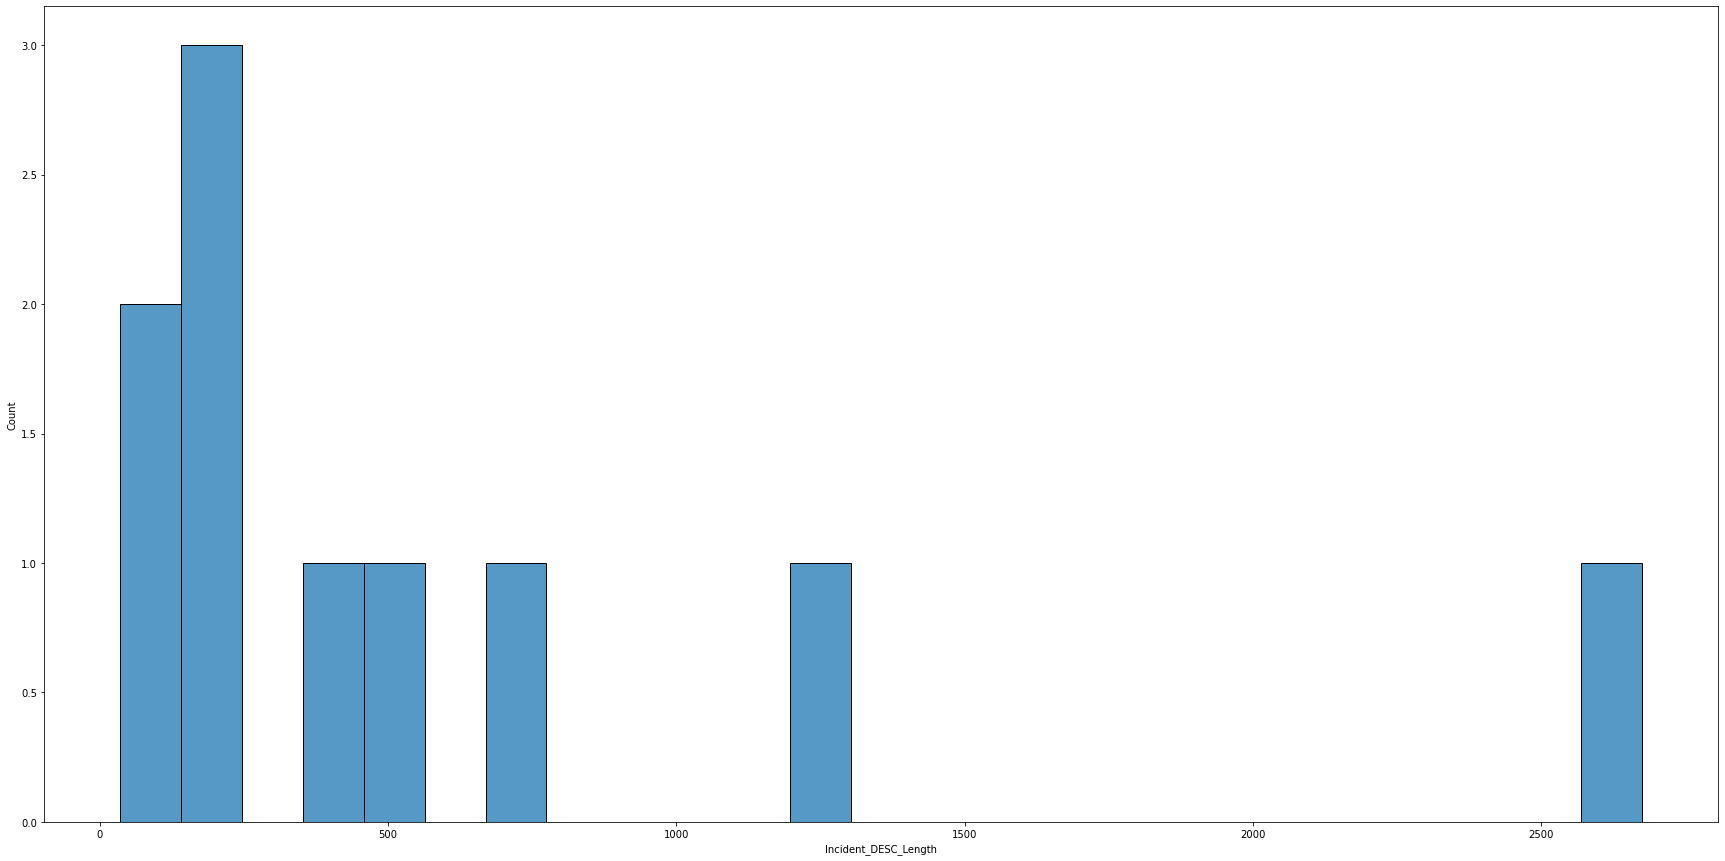

In [56]:
fig_dims = (30, 15)
fig, ax = plt.subplots(figsize=fig_dims)
sns.histplot(data=df_inc, x="Incident_DESC_Length", bins= 25, ax = ax)

In [61]:
nlp = spacy.load('en_core_web_sm')
rev = ' '.join(df_inc['INCIDENT_DESC'].tolist())
doc = nlp(rev)

In [62]:
tokens = pd.DataFrame(columns=['Token','Lemma','Stopwards'])

tok = []
lem = []
stop = [] 
for t in doc:
    tok.append(str(t))
    lem.append(t.lemma_)
    stop.append(t.is_stop)


tokens["Token"] = tok
tokens['Lemma'] = lem
tokens['Stopwards'] = stop

tokens.head()

,Token,Lemma,Stopwards
0,The,the,True
1,Pending,Pending,False
2,Bank,Bank,False
3,Loan,Loan,False
4,Service,Service,False


In [63]:
tokens.shape

(1196, 3)

In [64]:
print("Total number of non-important words: ",tokens['Stopwards'][tokens['Stopwards']==True].count())
print("Total number of important words: ",tokens['Stopwards'][tokens['Stopwards']==False].count())

Total number of non-important words:  307
Total number of important words:  889


In [65]:
tokens = tokens.loc[tokens["Stopwards"] != True]
tokens.head()

,Token,Lemma,Stopwards
1,Pending,Pending,False
2,Bank,Bank,False
3,Loan,Loan,False
4,Service,Service,False
6,missing,miss,False


In [ ]:
tokens.shape

In [66]:
import re
regex = re.compile('[@_!#$%^&*()"''"<>?/\|}{~:,.;-=+<>?~`]')
temp = tokens.loc[tokens['Token'].str.contains(regex, regex=True) == False]

In [67]:
temp.shape

(596, 3)

<AxesSubplot:xlabel='count', ylabel='Token'>

/Users/divyanshdahiya/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/divyanshdahiya/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


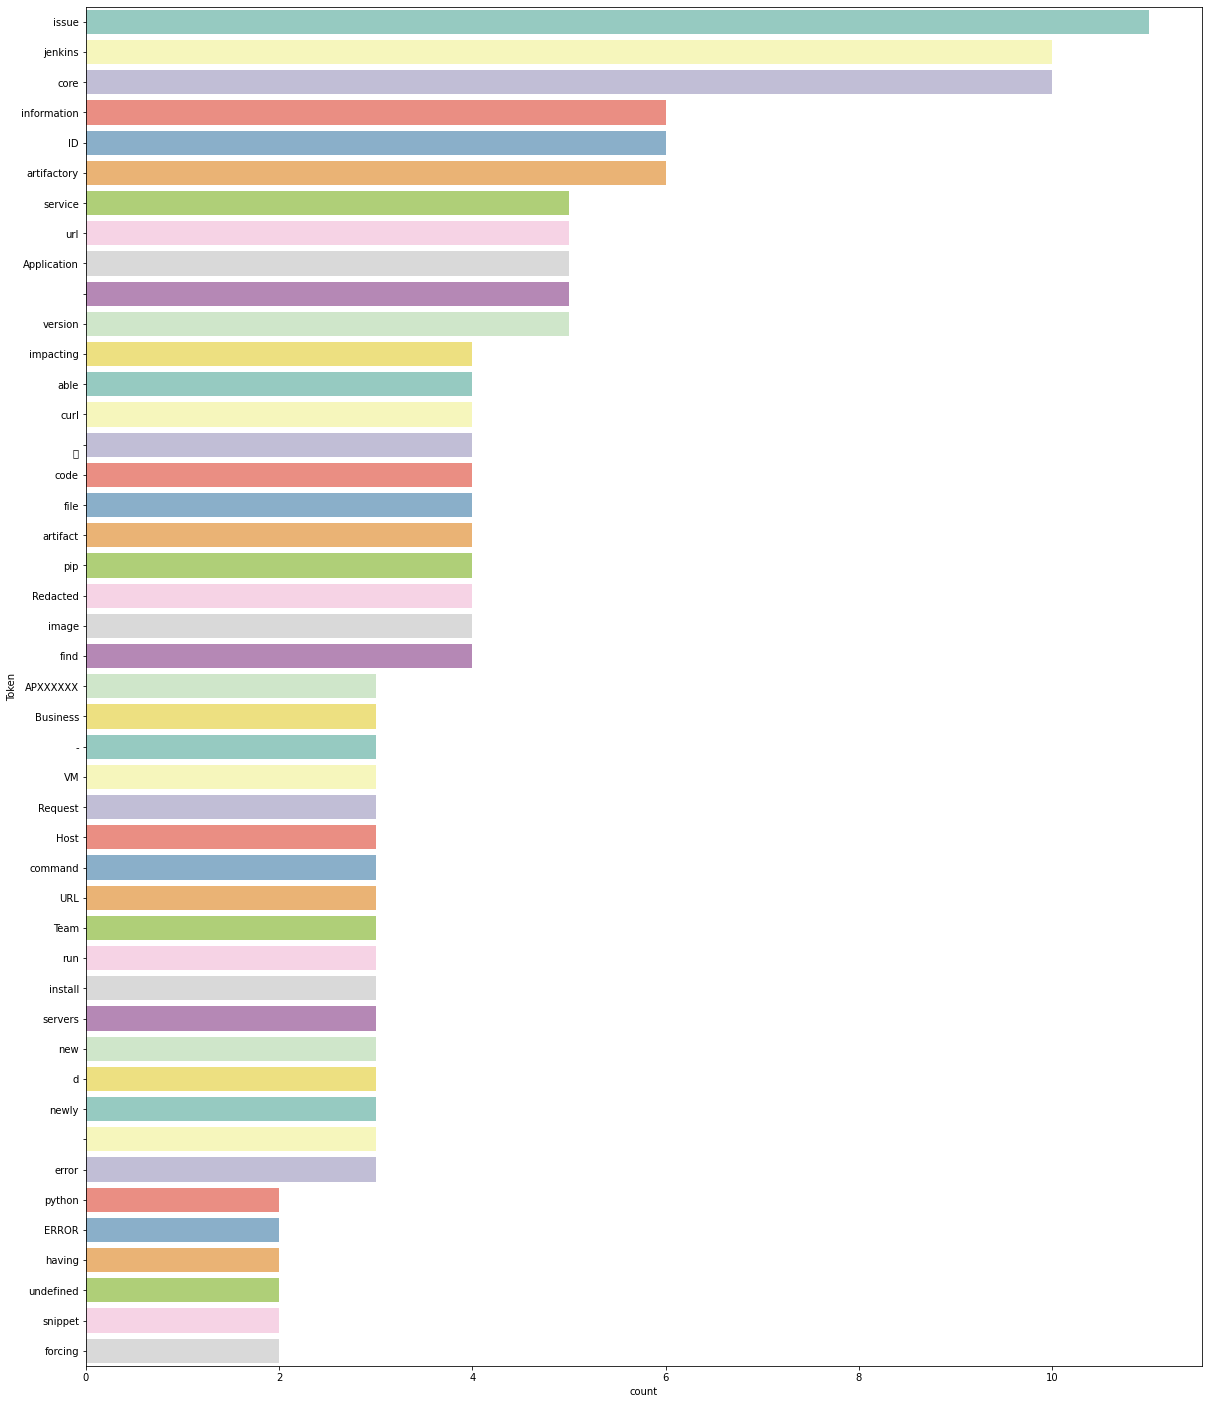

In [70]:
fig_dims = (20, 25)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(data=temp, y="Token", order = temp['Token'].value_counts().iloc[5:50].index, palette="Set3")

### Change Tickets

In [10]:
df_ch  = pd.read_excel('Incident and Change Ticket Sample.xlsx', index_col=0, sheet_name = 'Change Ticket Sample')  

In [11]:
df_ch.head()

,CHANGE_CATEGORY_CD,CHANGE_SUB_CATEGORY_TXT,CHANGE_SHORT_DESC,CHANGE_DESC,CHANGE_REQUEST_TYPE_CD,CHANGE_APPLICATION_ID,CHANGE_APPLICATION_NAME,CHANGE_APPROVAL_CD,CHANGE_IMPACT_CD,CHANGE_ENVIRONMENT_DESC,...,CHANGE_REQUEST_RISK_CD,CHANGE_REQUEST_PLATFORM_CD,CHANGE_JUSTIFICATION_TXT,CHANGE_PRIORITY_CD,CHANGE_URGENCY_CD,CHANGE_CONFIG_ITEM_NAME,CHANGE_CONFIG_ITEM_CLASS_NAME,CHANGE_UNAUTHORIZED_IND,CHANGE_WORK_START_TS,CHANGE_WORK_END_TS
CHANGE_TICKET_NBR,,,,,,,,,,,,,,,,,,,,,
CMXXXXXXXXX,Network,Configuration,Migrate Existing Non-Production Application to...,Migrate an existing ALB configuration in the n...,Normal,NaN,NaN,Approved,3 - Medium,Non-Production,...,Low,NaN,NaN,4 - Low,3 - Low,NaN,Server,N,NaT,NaT
CMXXXXXXXXX,Application,Patch,SNTM: Server Name - EI Server Patching - Linux...,Reschedules and cancellations can be performed...,Normal,NaN,NaN,Approved,3 - Medium,Non-Production,...,Low,NaN,NaN,4 - Low,3 - Low,Server Name1,Linux Server,N,2021-01-14 02:00:00,2021-01-14 09:00:00
CM212212245,Network,Configuration,Migrate Existing Non-Production Application to...,Migrate an existing ALB configuration in the n...,Normal,NaN,NaN,Approved,3 - Medium,Non-Production,...,Low,NaN,NaN,4 - Low,3 - Low,NaN,Server,N,NaT,NaT
CMXXXXXXXXX,Network,Configuration,Create Net-New Non-Prod Load Balancing Configu...,Restricted Deployment Change for Automated Loa...,Normal,NaN,NaN,Approved,3 - Medium,Non-Production,...,Low,NaN,NaN,4 - Low,3 - Low,NaN,Server,N,NaT,NaT
CMXXXXXXXXX,Network,Configuration,Repoint Non-Prod application (application name...,Repoint an existing ADC configuration in the n...,Normal,NaN,NaN,Approved,3 - Medium,Non-Production,...,Low,NaN,NaN,4 - Low,3 - Low,NaN,Server,N,NaT,NaT


In [13]:
df_ch.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, CMXXXXXXXXX to CMXXXXXXXXX
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   CHANGE_CATEGORY_CD             10 non-null     object        
 1   CHANGE_SUB_CATEGORY_TXT        10 non-null     object        
 2   CHANGE_SHORT_DESC              10 non-null     object        
 3   CHANGE_DESC                    10 non-null     object        
 4   CHANGE_REQUEST_TYPE_CD         10 non-null     object        
 5   CHANGE_APPLICATION_ID          1 non-null      object        
 6   CHANGE_APPLICATION_NAME        1 non-null      object        
 7   CHANGE_APPROVAL_CD             10 non-null     object        
 8   CHANGE_IMPACT_CD               10 non-null     object        
 9   CHANGE_ENVIRONMENT_DESC        10 non-null     object        
 10  CHANGE_STATUS_CD               10 non-null     object        
 11  CHANGE_

In [35]:
print("Types of unique values: ",df_ch['CHANGE_CATEGORY_CD'].unique())

Types of unique values:  ['Network' 'Application' 'Hardware' 'Software']


In [47]:
print("Types of unique values: ",df_ch['CHANGE_REQUEST_TYPE_CD'].unique())

Types of unique values:  ['Normal']


In [48]:
print("Types of unique values: ",df_ch['CHANGE_ASSIGNMENT_GROUP_TXT'].unique())

Types of unique values:  ['gns-atm-chg' 'uts-integration-2' 'fit compliance distributed'
 'gns-auto-chg']


In [49]:
print("Types of unique values: ",df_ch['CHANGE_STATUS_CD'].unique())

Types of unique values:  ['Closed Complete']


In [51]:
print("Types of unique values: ",df_ch['CHANGE_APPLICATION_ID'].unique())

Types of unique values:  [nan 'APXXXXXX']


In [50]:
print("Types of unique values: ",df_ch['CHANGE_APPLICATION_NAME'].unique())

Types of unique values:  [nan 'FI COMPLIANCE PORTAL']


In [74]:
arr = []
for i in range(0,len(df_ch['CHANGE_DESC'])): 
    arr.append(len(df_ch['CHANGE_DESC'][i]))
df_ch["Change_DESC_Length"] = arr  

In [75]:
df_ch[['CHANGE_DESC','Change_DESC_Length']]

,CHANGE_DESC,Change_DESC_Length
CHANGE_TICKET_NBR,,
CMXXXXXXXXX,Migrate an existing ALB configuration in the n...,469
CMXXXXXXXXX,Reschedules and cancellations can be performed...,970
CM212212245,Migrate an existing ALB configuration in the n...,469
CMXXXXXXXXX,Restricted Deployment Change for Automated Loa...,336
CMXXXXXXXXX,Repoint an existing ADC configuration in the n...,399
CMXXXXXXXXX,Please mount the following file system on the...,77
CMXXXXXXXXX,Requestor has asked for UTS while installing s...,495
CMXXXXXXXXX,Overview:\n\nThis is a STANDARD CHANGE REQUEST...,369
CMXXXXXXXXX,Detail what you are doing? 1. The change i...,820


<AxesSubplot:xlabel='Change_DESC_Length', ylabel='Count'>

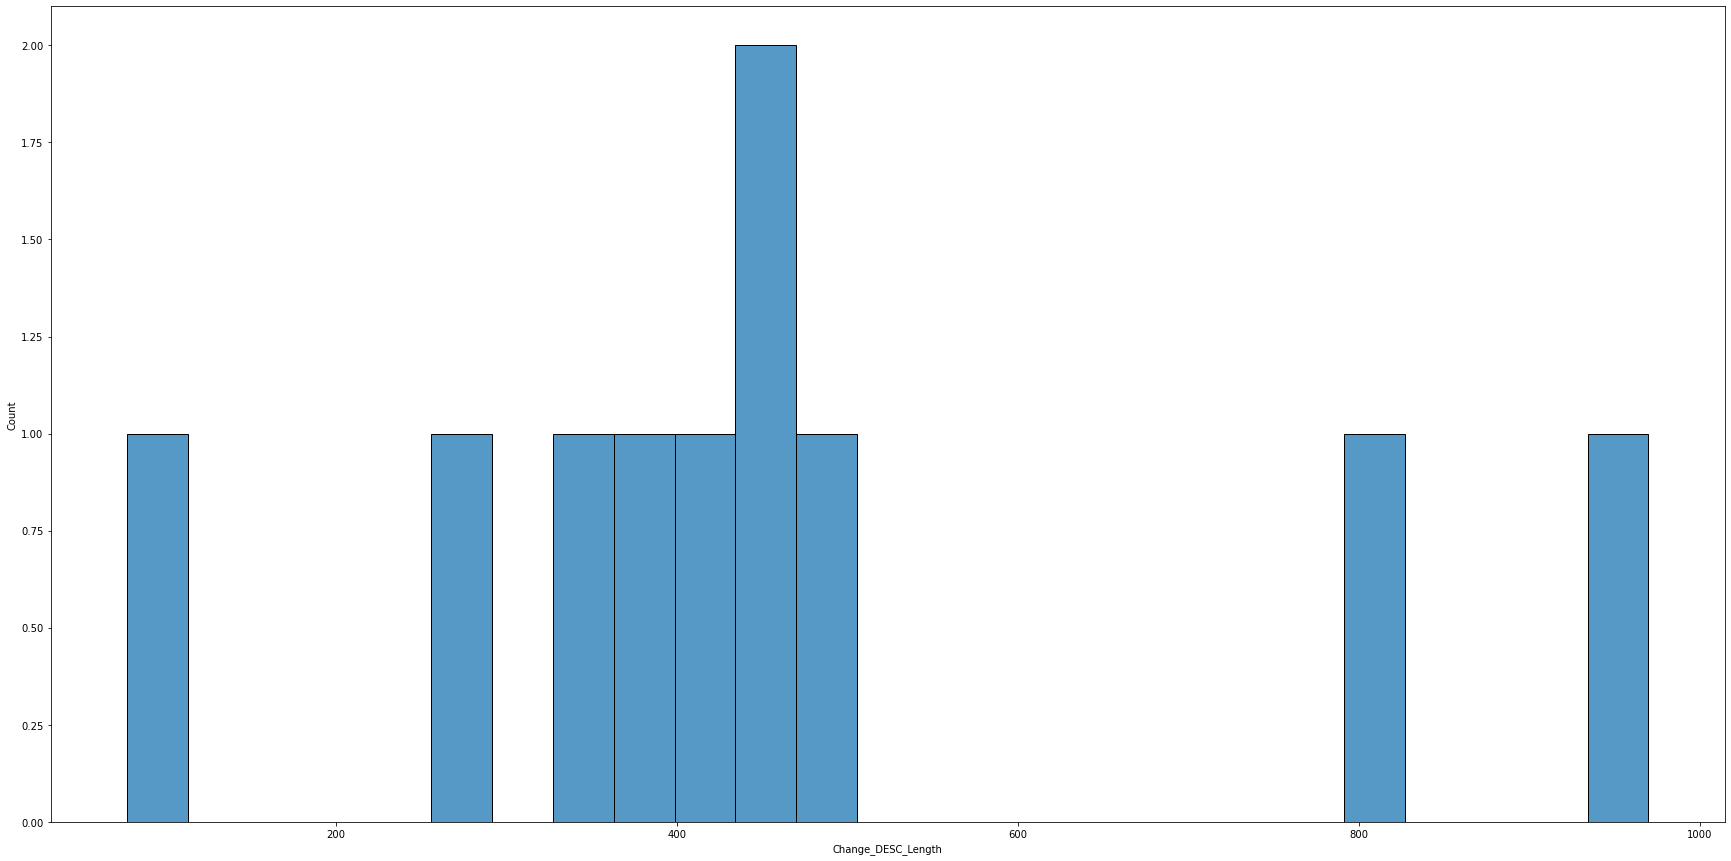

In [77]:
fig_dims = (30, 15)
fig, ax = plt.subplots(figsize=fig_dims)
sns.histplot(data=df_ch, x="Change_DESC_Length", bins= 25, ax = ax)

In [79]:
rev = ' '.join(df_ch['CHANGE_DESC'].tolist())
doc = nlp(rev)

In [80]:
tokens = pd.DataFrame(columns=['Token','Lemma','Stopwards'])

tok = []
lem = []
stop = [] 
for t in doc:
    tok.append(str(t))
    lem.append(t.lemma_)
    stop.append(t.is_stop)


tokens["Token"] = tok
tokens['Lemma'] = lem
tokens['Stopwards'] = stop

tokens.head()

,Token,Lemma,Stopwards
0,Migrate,Migrate,False
1,an,an,True
2,existing,exist,False
3,ALB,ALB,False
4,configuration,configuration,False


In [81]:
tokens.shape

(934, 3)

In [82]:
print("Total number of non-important words: ",tokens['Stopwards'][tokens['Stopwards']==True].count())
print("Total number of important words: ",tokens['Stopwards'][tokens['Stopwards']==False].count())

Total number of non-important words:  295
Total number of important words:  639


In [83]:
tokens = tokens.loc[tokens["Stopwards"] != True]
tokens.head()

,Token,Lemma,Stopwards
0,Migrate,Migrate,False
2,existing,exist,False
3,ALB,ALB,False
4,configuration,configuration,False
7,non,non,False


In [84]:
import re
regex = re.compile('[@_!#$%^&*()"''"<>?/\|}{~:,.;-=+<>?~`]')
temp = tokens.loc[tokens['Token'].str.contains(regex, regex=True) == False]

In [85]:
temp.shape

(510, 3)

<AxesSubplot:xlabel='count', ylabel='Token'>

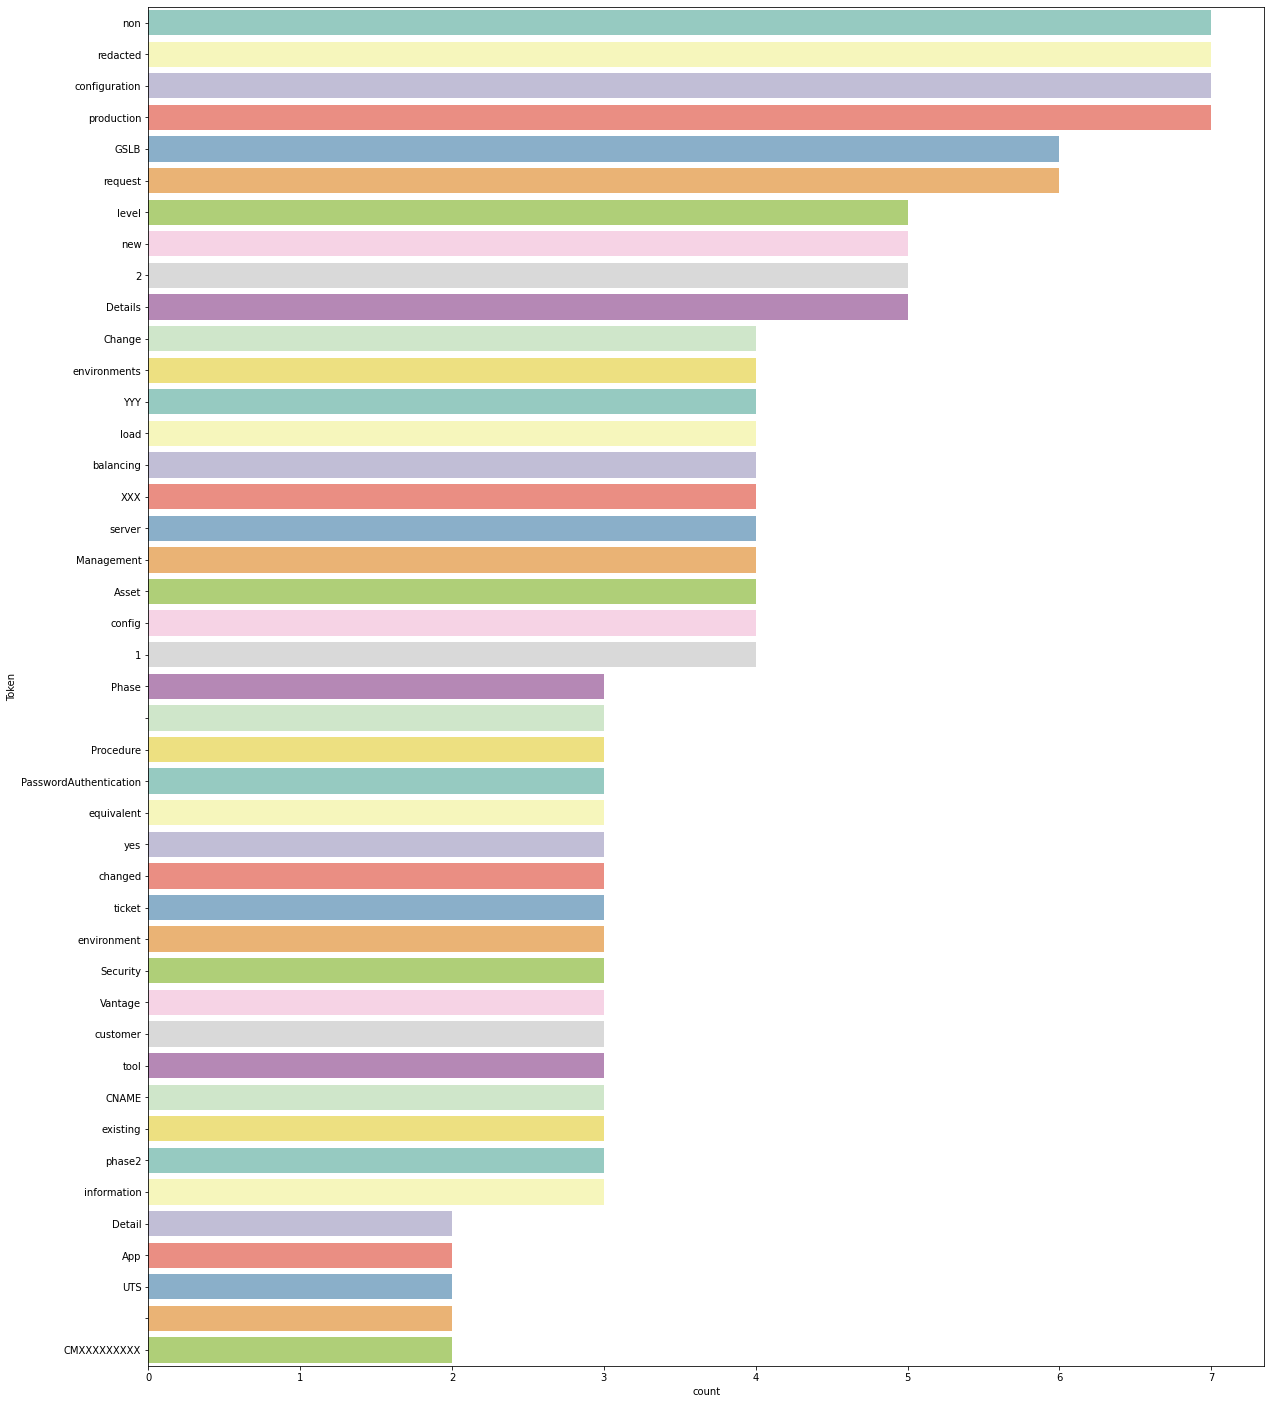

In [87]:
fig_dims = (20, 25)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(data=temp, y="Token", order = temp['Token'].value_counts().iloc[7:50].index, palette="Set3")